# Analýza hlavních komponent (PCA)

...a jiné metody průzkumu dat a redukce počtu dimenzí

## Co se naučíte

Analýza hlavních komponent (anglicky “principal component analysis” neboli PCA) je metoda na snížení počtu dimenzí mnohorozměrných dat. To se může hodit z hlediska vizualizace nebo kvůli úspoře času/paměti při strojovém učení.

Ještě než začneme, stáhněte si prosím tento notebook na svůj počítač, otevřete jej s pomocí Jupyter Notebook a spuštěním následující buňky nahrajte potřebné knihovny.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline
sns.set_style('whitegrid')

## Jak porovnat babičce víno ve spíži?

Data níže obsahují 13 různých charakteristik 178 vín. Představte si, že chcete tato vína vykreslit jako body do grafu. Případně si představte, že vás babička poprosila, abyste je vyrovnali do polic tak, aby "podobná" vína byla u sebe?

In [36]:
from sklearn.datasets import load_wine
wine = load_wine()

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
print(wine_df.shape)
wine_df.head()

(178, 13)


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

Jak to uděláte? Jedna možnost je vybrat si dvojici dvou vlastností, která je zásadní pro vaše data. Ale co když se ve víně nevyznáte? Můžete pochopitelně vykreslit grafy všech možných dvojic. 

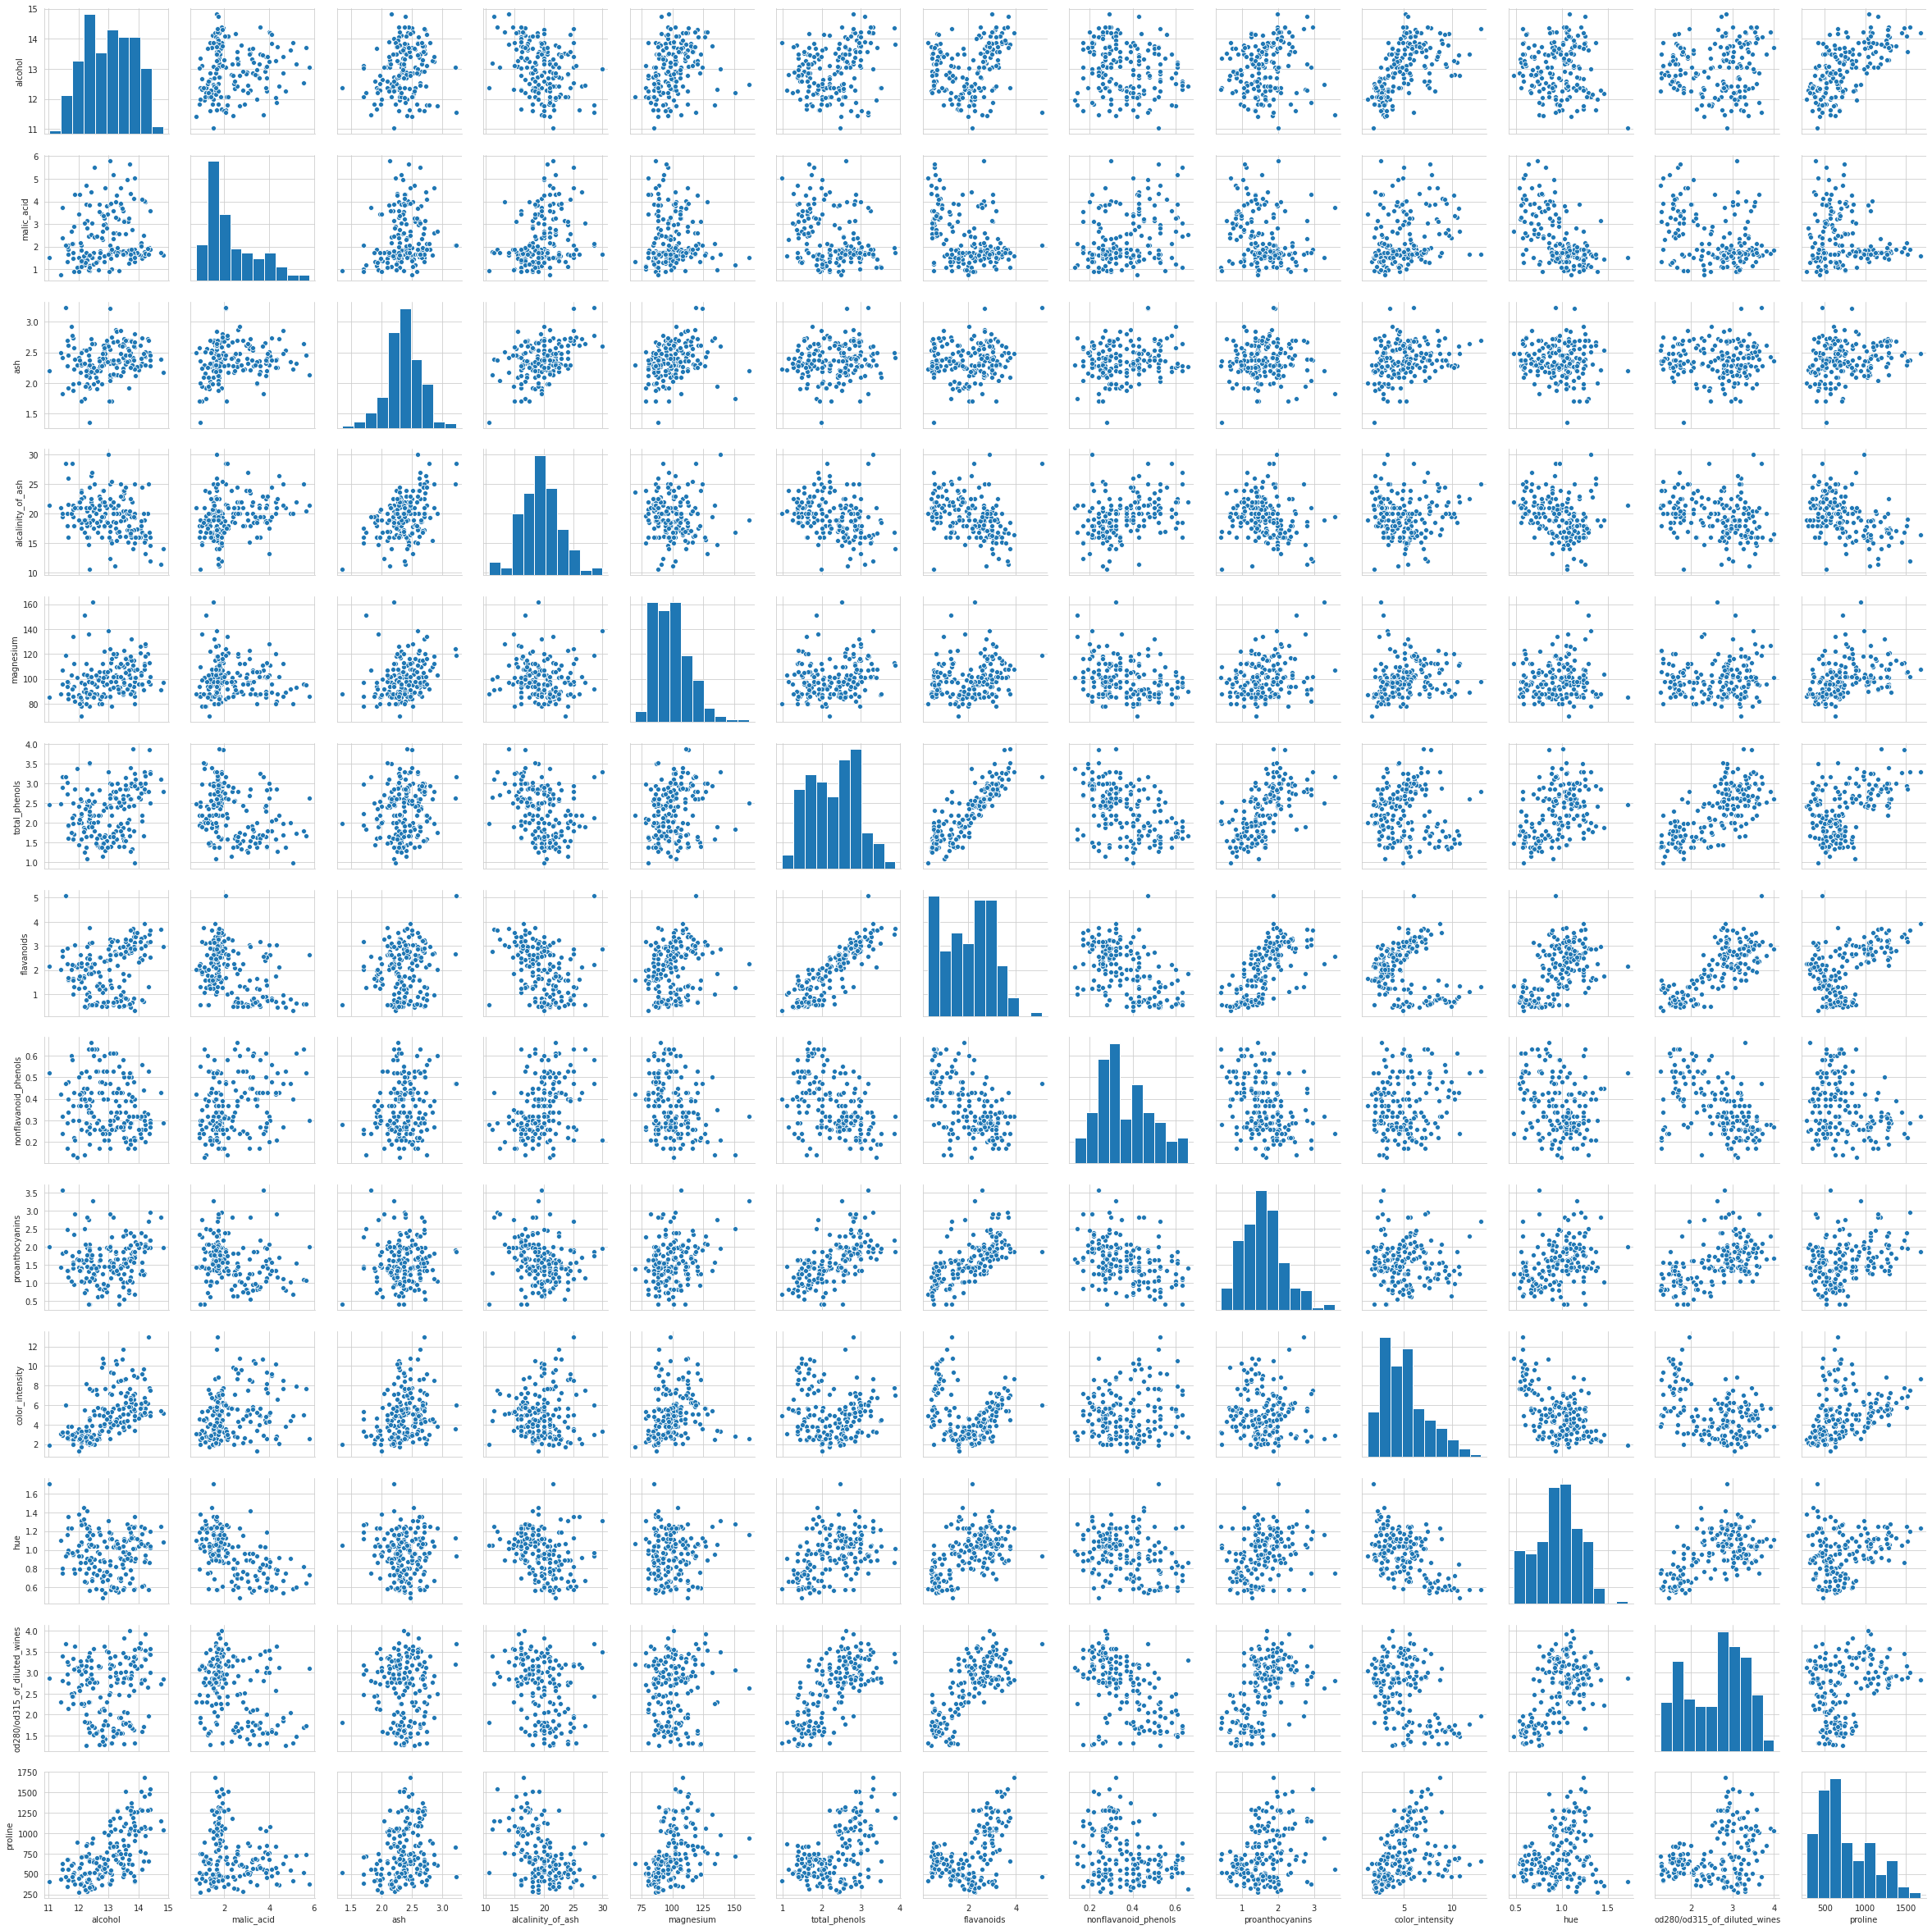

In [37]:
sns.pairplot(wine_df);

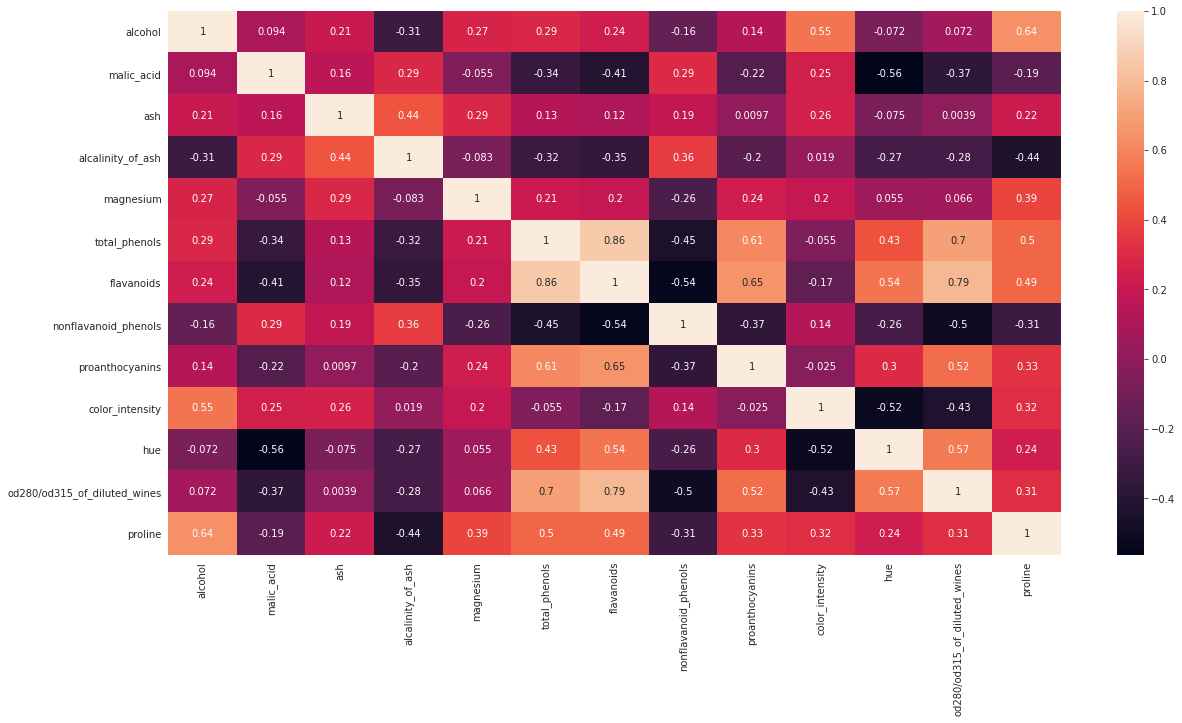

In [39]:
plt.figure(figsize=(20,10)) 
sns.heatmap(wine_df.corr(), annot=True); 

Jak vidíme, mnoho charakteristik je korelovaných (např. `total_phenols` a `flavanoids`).  PCA umožňuje převést mnoho charakteristik na na několik málo, které a) jsou nezávislé b) zachycují maximum informace (variability) v datech.

Protože obrazovky a stěny ve spíži obvykle bývají dvourozměrné, budeme po zbytek notebooku zjednodušovat z X charakteristik na dvě, abychom tyto potom mohli zakreslit do grafu. Podívejme se, jak to dopadne pro vína.

### PCA graf

In [104]:
# Tento blok znormalizuje sloupečky v tabulce, aby měli průměr nula a rozptyl jedna
scaler = StandardScaler()
wine_df_scaled = scaler.fit_transform(wine_df)

In [105]:
# Tento blog spočte PCA souřadnice (volíme zjednodušení na dvě komponenty)
pca = PCA(n_components=2)
wine_pca = pd.DataFrame(pca.fit_transform(wine_df_scaled), columns=['PCA1', 'PCA2'])
wine_pca

PCA1      PCA2
0    3.316751 -1.443463
1    2.209465  0.333393
2    2.516740 -1.031151
3    3.757066 -2.756372
4    1.008908 -0.869831
..        ...       ...
173 -3.370524 -2.216289
174 -2.601956 -1.757229
175 -2.677839 -2.760899
176 -2.387017 -2.297347
177 -3.208758 -2.768920

[178 rows x 2 columns]

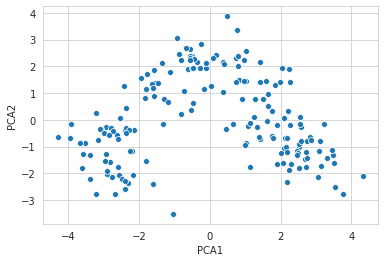

In [106]:
# A tento je zakreslí do grafu
sns.scatterplot(wine_pca.PCA1, y=wine_pca.PCA2);

Splnili jsme úkol, bude babička spokojená? Jsou podobná vína zakreslená poblíž sebe? 

K vínům v databázi lze získat ještě jednu informaci - vína patří do jedné ze tří kategorií (barva vína?). A skutečně, pokud si body na PCA grafu obarvíme podle kategorie vína, jasně vidíme tři clustery.

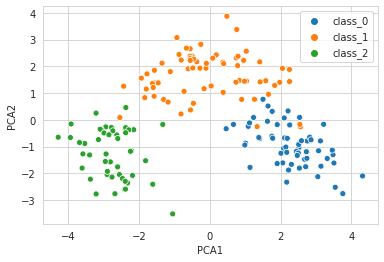

In [107]:
sns.scatterplot(wine_pca.PCA1, y=wine_pca.PCA2, hue=wine.target_names[wine.target]);

### Podíl zachycené variability

Můžeme se též ptát, kolik procent variability je v prvních dvou PCA komponentách zachyceno.

In [108]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

## Cvičení 1: Kosatce

V minulé hodině jsme zmínili Fisherova slavná data o kosatcích. Připomeňme, že se jedná o 50 rostlin z 3 různých druhů kosatců a na každé bylo provedeno měření 4 charakteristik. Jak vidíme, jsou značně korelované.

In [31]:
from sklearn.datasets import load_iris
iris = load_iris()

col_names = list(iris.feature_names)
iris_df = pd.DataFrame(iris.data, columns=col_names)
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

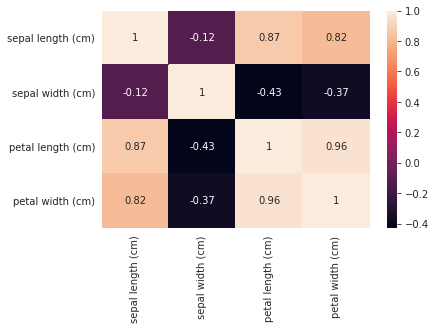

In [33]:
sns.heatmap(iris_df.corr(), annot=True); 

![iris](https://naucse.python.cz/2020/pydata-praha-jaro/pydata/classification_metrics/static/iris_data.png)

Zredukujte tyto čtyři charakteristiky na dvě PCA, spočtěte množství vysvětlené variability a vykreslete vše do scatterplotu, který obarvíte podle druhu kosatce (v proměnné `iris.target_names[iris.target]`). Je na PCA grafu vidět rozdíl mezi druhy kosatců?

In [34]:
# sem napište řešení

## Breast Cancer Wisconsin Dataset

Data z klinických měření ohledně rakoviny prsu z Winconsinské univerzity. Celkem máme 569 pacientů a u každého z nich 31 veličin ohodnocujících [FNA snímek prsní tkáně](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) a informaci, zda-li byl nádor zhoubný (maligní) či nezhoubný (benigní).

In [141]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

col_names = list(cancer.feature_names)
col_names.append('target')
cancer_df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_names)
print(cancer_df.shape)
print(cancer.target_names)
cancer_df.head()

(569, 31)
['malignant' 'benign']


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

Začněme stejně jako v minulém případě pohledem párovými grafy, které si tentokrát obarvíme dle typu nádoru.

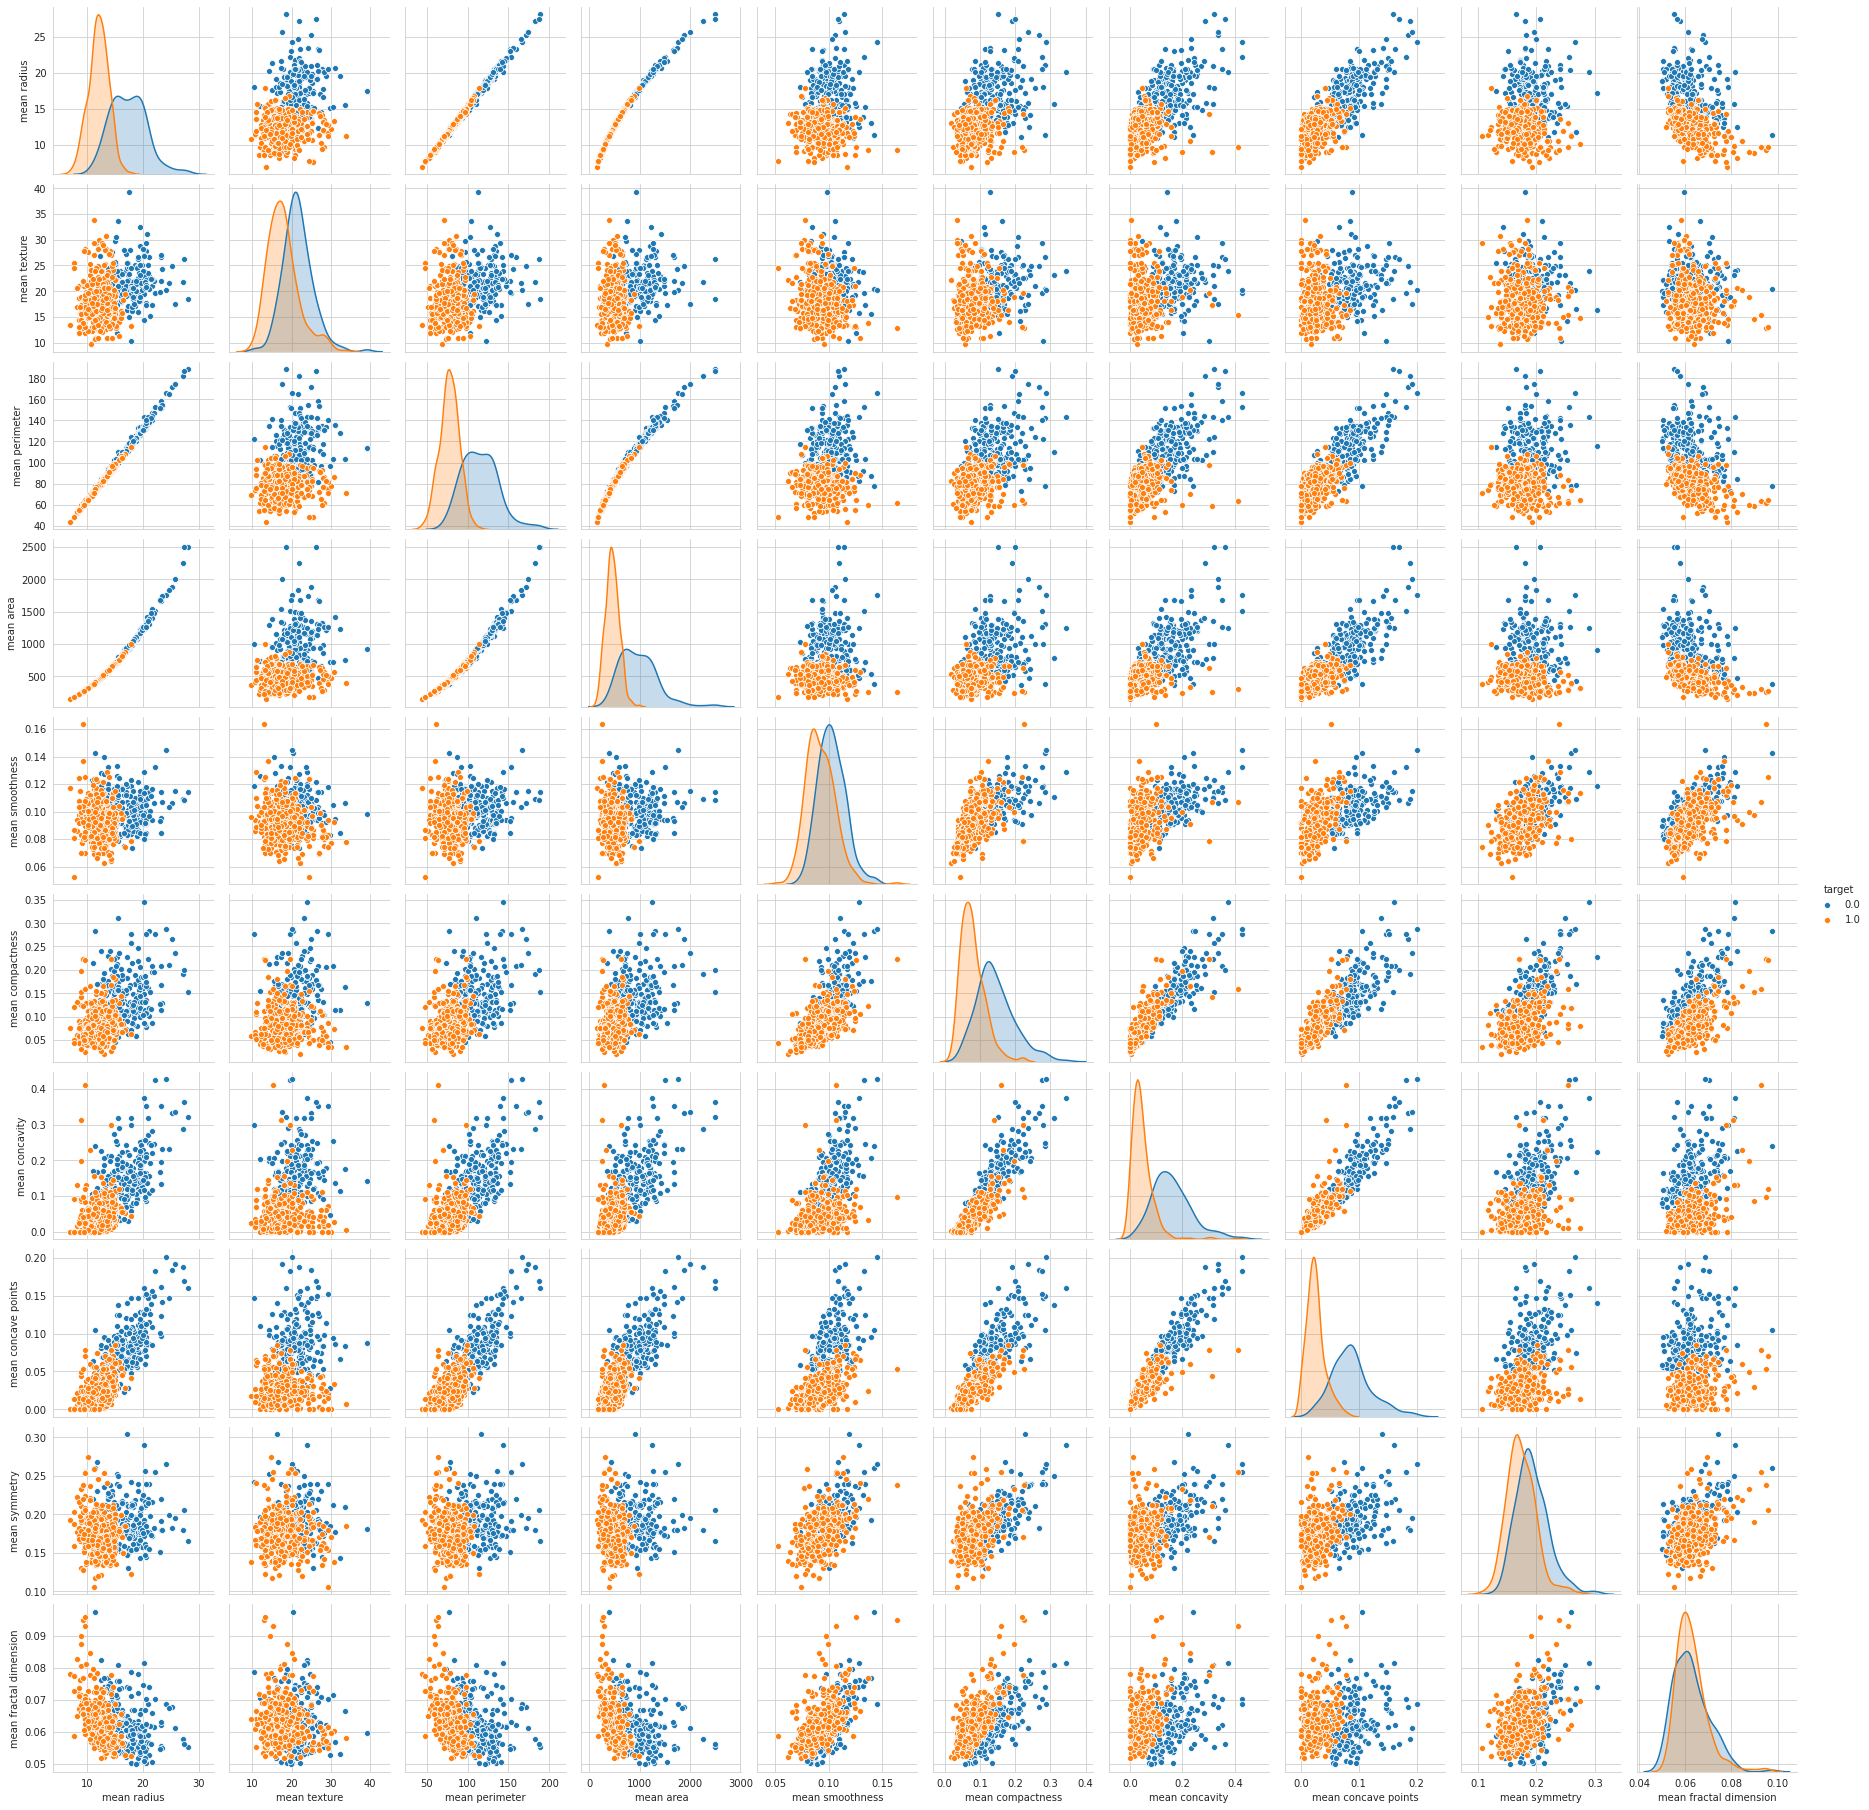

In [56]:
sns.pairplot(cancer_df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 
                                     'mean smoothness', 'mean compactness', 'mean concavity',
                                     'mean concave points', 'mean symmetry', 'mean fractal dimension']);

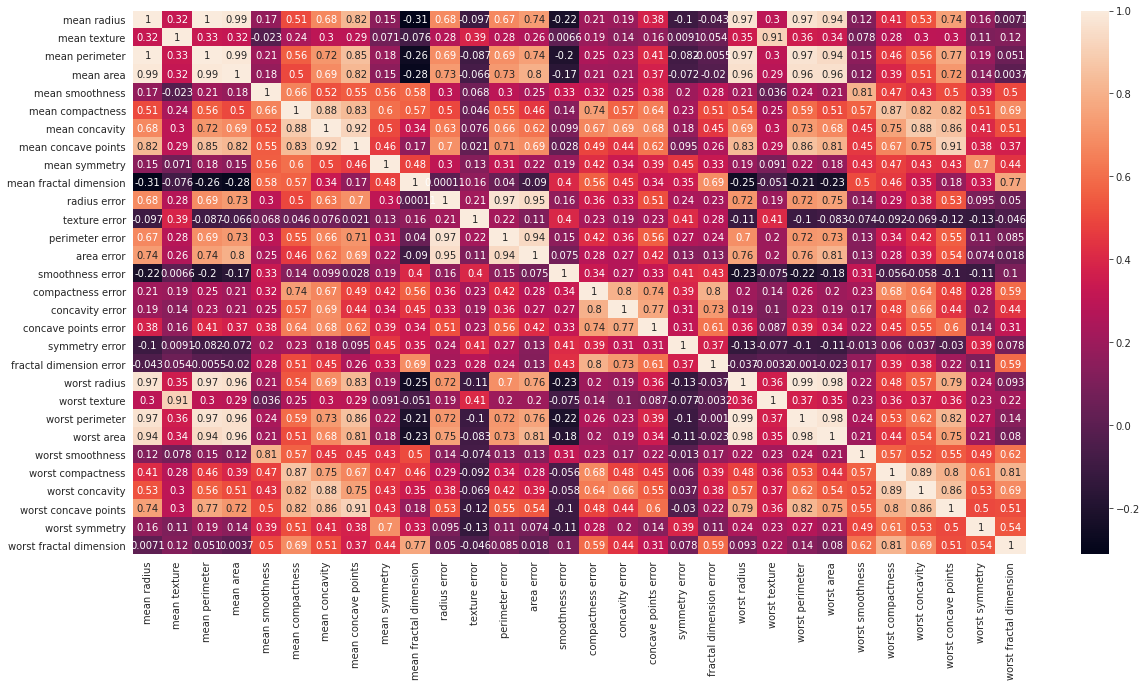

In [69]:
plt.figure(figsize=(20,10)) 
sns.heatmap(cancer_df.drop(columns="target").corr(), annot=True); 

In [ ]:
Na první pohled vidíme, že některé charakteristiky nesou více informace než jiné.

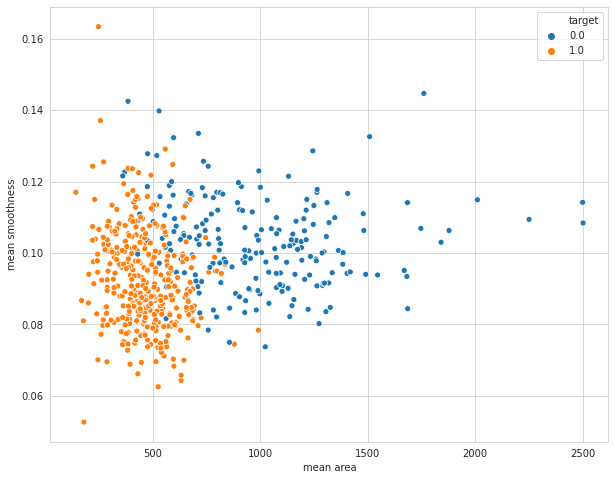

In [110]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = cancer_df)

Spočítejme tedy nyní PCA komponenty, jejich podíl na variabilitě a nakresleme PCA graf.

In [71]:
scaler = StandardScaler()
scaler.fit(df.drop('target', axis=1))
scaled_data = scaler.transform(cancer_df.drop('target', axis=1))

In [72]:
pd.DataFrame(scaled_data).head()

0         1         2         3         4         5         6   \
0  1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1  1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2  1.579888  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3 -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4  1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   

         7         8         9   ...        20        21        22        23  \
0  2.532475  2.217515  2.255747  ...  1.886690 -1.359293  2.303601  2.001237   
1  0.548144  0.001392 -0.868652  ...  1.805927 -0.369203  1.535126  1.890489   
2  2.037231  0.939685 -0.398008  ...  1.511870 -0.023974  1.347475  1.456285   
3  1.451707  2.867383  4.910919  ... -0.281464  0.133984 -0.249939 -0.550021   
4  1.428493 -0.009560 -0.562450  ...  1.298575 -1.466770  1.338539  1.220724   

         24        25        26        27        28        29  
0  1.307686  2.616665  2.109526  2.296076  2.750622  1.937015  
1 -0.375612 -0.430444 -0.146749  1.087084 -0.243890  0.281190  
2  0.527407  1.082932  0.854974  1.955000  1.152255  0.201391  
3  3.394275  3.893397  1.989588  2.175786  6.046041  4.935010  
4  0.220556 -0.313395  0.613179  0.729259 -0.868353 -0.397100  

[5 rows x 30 columns]

In [114]:
pca = PCA(n_components=2)
cancer_pca = pd.DataFrame(pca.fit_transform(scaled_data), columns=['PCA1', 'PCA2'])
cancer_pca

PCA1       PCA2
0     9.192837   1.948583
1     2.387802  -3.768172
2     5.733896  -1.075174
3     7.122953  10.275589
4     3.935302  -1.948072
..         ...        ...
564   6.439315  -3.576817
565   3.793382  -3.584048
566   1.256179  -1.902297
567  10.374794   1.672010
568  -5.475243  -0.670637

[569 rows x 2 columns]

In [115]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

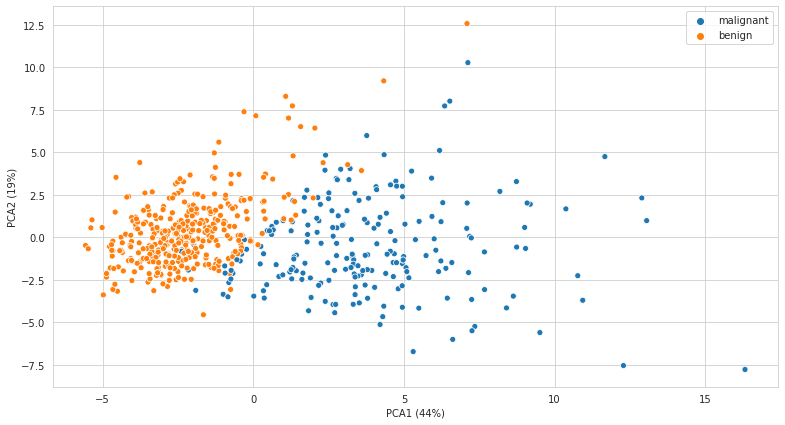

In [138]:
plt.figure(figsize=(13,7))
sns.scatterplot(cancer_pca.PCA1, y=cancer_pca.PCA2, 
                hue=cancer.target_names[cancer.target],
                
               )
plt.xlabel('PCA1 (44%)')
plt.ylabel('PCA2 (19%)');

Na PCA grafu je vidět několik oranžových (benigních) teček uprostřed modré oblasti. Možná by bylo dobré podívat se na tyto pacienty podrobněji. Ale na jak zjistíme, kolikátému řádku bod odpovídá? Potřebujeme interaktivní graf!

### Interaktivní PCA graf

In [123]:
import plotly.express as px

In [133]:
# V našich datech není Patient ID, tak si nějaké vytvoříme
cancer_df['patient'] = ['Patient' + str(i) for i in range(cancer_df.shape[0])]
cancer_df['patient']

0        Patient0
1        Patient1
2        Patient2
3        Patient3
4        Patient4
          ...    
564    Patient564
565    Patient565
566    Patient566
567    Patient567
568    Patient568
Name: patient, Length: 569, dtype: object

In [140]:
# naucse.python.cz neumí zobrazit interaktivní graf, proto je níže zakomentovaný
fig = px.scatter(x=cancer_pca.PCA1, y=cancer_pca.PCA2, color=cancer.target_names[cancer.target],
                 hover_name = cancer_df['patient'])
#fig.show()  # zrušte komentář pro nakreslení obrázku

### Interpretace koeficientů

Aniž bychom příliš zabíhali do matematické podstaty PCA, každá komponenta je ve skutečnosti lineární kombinací jendotlivých charakteristik (po normalizaci), tedy např.

$$\texttt{PCA}_1 =  \beta_0 + \beta_1 * \texttt{Vlastnost(1)} + \beta_2 * \texttt{Vlastnost(2)} + \cdots + \beta_k * \texttt{Vlastnost(k)}$$

Pokud jsme sloupce normalizovali pomocí `StandardScaler`, můžeme velikost koeficientů (v absolutní hodnotě) do jisté míry interpretovat jako jak moc se daná vlastnost na PCA komponentě podílí. Buďte však v této interpretaci opatrní (je snadné vidět v datech něco, co tam ve skutečnosti není).

In [126]:
loadings = pd.DataFrame(pca.components_.T, index=cancer_df.columns[:-2], columns=cancer_pca.columns) 
loadings.sort_values('PCA1', ascending=False).head(n=10)

PCA1      PCA2
mean concave points   0.260854 -0.034768
mean concavity        0.258400  0.060165
worst concave points  0.250886 -0.008257
mean compactness      0.239285  0.151892
worst perimeter       0.236640 -0.199878
worst concavity       0.228768  0.097964
worst radius          0.227997 -0.219866
mean perimeter        0.227537 -0.215181
worst area            0.224871 -0.219352
mean area             0.220995 -0.231077

## Cvičení 2: Vliv stárnutí na expresi proteinů v ledvinách

Pro druhé cvičení využijeme měření exprese proteinů z myších ledvin. Celkem máme 188 myší, které se liší pohlavím (samci, samice), zařazením do skupiny (generace, G8-G12) a věkem (6, 12 či 18 měsíců). Více informací o experimentu naleznete na [https://ytakemon.github.io/TheAgingKidney/analysis.html](https://ytakemon.github.io/TheAgingKidney/analysis.html). Názvy proteinů byly anonymizovány.

Na základě proteinové exprese nakreslete PCA graf a rozhodněte, jestli první dvě komponenty odpovídají nějaké informaci, kterou v záznamech máte (pohlaví, skupina, věk). Pokud vám zbyde čas, pokuste se nakreslit interaktivní graf.

In [143]:
url_protein_expr = 'http://github.com/simecek/naucse.python.cz/blob/master/lessons/pydata/pca/static/protein_expr.zip?raw=true'
protein_expr = pd.read_csv(url_protein_expr, compression="zip")
print(protein_expr.shape)
protein_expr.head()

(188, 4548)


Mouse_ID Sex Generation    Age  Protein_1  Protein_2  Protein_3  Protein_4  \
0  DO-0661   F         G8  12mos  -0.272366   0.164789  -0.720521  -0.098587   
1  DO-0669   F         G8  18mos   1.860412   0.637867  -0.654035   0.720521   
2  DO-0670   F         G8  12mos  -0.191457   1.006581  -0.864279   0.045949   
3  DO-0673   F         G8  18mos  -1.284541  -1.122194   0.178107   1.490375   
4  DO-0674   F         G8  12mos  -0.498969  -0.590323  -0.621864   2.151794   

   Protein_5  Protein_6  ...  Protein_6696  Protein_6697  Protein_6698  \
0   0.606018   0.383201  ...     -1.790968      0.245224     -0.272366   
1  -0.621864   0.327281  ...      0.383201     -1.531465      0.864279   
2   0.903064  -0.341158  ...     -0.425932     -0.045949     -1.097893   
3  -0.772547   1.575317  ...      0.963935      0.513889      0.670377   
4   0.111784  -0.085408  ...      0.590323      0.590323     -1.122194   

   Protein_6699  Protein_6700  Protein_6702  Protein_6705  Protein_6706  \
0     -0.245224     -0.245224      2.034663      1.255151     -0.178107   
1      0.574773      1.006581      2.559868      0.574773      0.883505   
2     -1.531465      0.341158     -0.245224      0.313466      1.097893   
3      0.703610     -0.111784     -0.808421      0.178107      0.245224   
4     -1.315084     -0.484160      0.138238      0.383201      1.531465   

   Protein_6715  Protein_6716  
0     -1.097893      1.284541  
1      0.218262      0.286012  
2      1.346906      1.006581  
3      0.574773      0.299711  
4      0.397363     -0.590323  

[5 rows x 4548 columns]

In [148]:
# sem napište řešení

Na závěr si ukažme dva trochu méně časté případy použití:

## Číslice

Ručně psaných 1797 číslic od 43 lidí, zmenšených do rastru 8x8, intenzita jasu od 0 do 16. Data pochází z [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

Podívejme se na jednu konkrétní číslici, jak vypadá její číselná reprezentace a její obrázek.

(1797, 64)
[[ 0.  0.  0.  0. 12.  5.  0.  0.]
 [ 0.  0.  0.  2. 16. 12.  0.  0.]
 [ 0.  0.  1. 12. 16. 11.  0.  0.]
 [ 0.  2. 12. 16. 16. 10.  0.  0.]
 [ 0.  6. 11.  5. 15.  6.  0.  0.]
 [ 0.  0.  0.  1. 16.  9.  0.  0.]
 [ 0.  0.  0.  2. 16. 11.  0.  0.]
 [ 0.  0.  0.  3. 16.  8.  0.  0.]]


<Figure size 432x288 with 0 Axes>

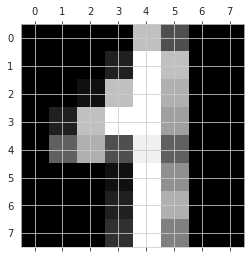

In [165]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
digits = load_digits()

#velikost dat
print(digits.data.shape)

# 42. číslice jako list
print(digits.images[42])

# 42. číslice jako obrázek
plt.gray() 
plt.matshow(digits.images[42].reshape(8,8));

In [159]:
digits.images[42].reshape(1,64)

array([[ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        12.,  0.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.,  0.,  2.,
        12., 16., 16., 10.,  0.,  0.,  0.,  6., 11.,  5., 15.,  6.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.]])

In [161]:
digits_df = digits.images.reshape(1797,64)
print(digits_df.shape)
digits_df[42,:]

(1797, 64)


array([ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
       12.,  0.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.,  0.,  2.,
       12., 16., 16., 10.,  0.,  0.,  0.,  6., 11.,  5., 15.,  6.,  0.,
        0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
       16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.])

In [210]:
# zkuste změnit počet komponent n_components a podívejte se, co se stane
n_components = 5
pca = PCA(n_components=n_components)
column_names = ["PCA" + str(i) for i in range(1,n_components+1)]

pca.fit(digits.images.reshape(1797,64))
digits_pca = pd.DataFrame(pca.transform(digits_df), columns=column_names)

digits_pca

PCA1       PCA2       PCA3       PCA4       PCA5
0     -1.259466  21.274883  -9.463054  13.014191  -7.128812
1      7.957611 -20.768699   4.439506 -14.893669   5.896073
2      6.991923  -9.955986   2.958558 -12.288303 -18.125945
3    -15.906105   3.332464   9.824372 -12.275838   6.965107
4     23.306867   4.269061  -5.675128 -13.851529  -0.358321
...         ...        ...        ...        ...        ...
1792 -14.606628  13.344124 -13.439048  -6.502953   3.787327
1793   6.464574  20.567299  -9.155110  12.554092  -9.015882
1794  10.801284  -6.960252   5.599555  -7.227737  -3.459769
1795  -4.872100  12.423954 -10.170866  -6.668848   3.569045
1796  -0.344390   6.365549  10.773708  -7.726211  -3.310518

[1797 rows x 5 columns]

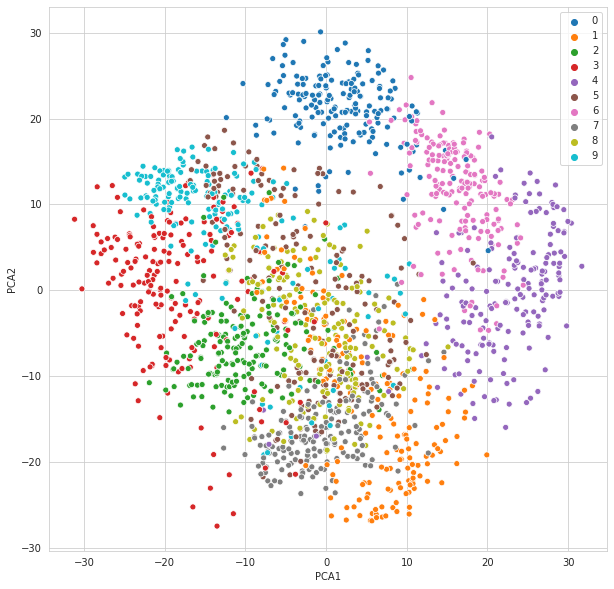

In [211]:
plt.figure(figsize=(10,10)) 
sns.scatterplot(digits_pca.PCA1, y=digits_pca.PCA2, 
                hue=digits.target_names[digits.target], legend='full',
                palette=sns.color_palette());

### Inverzní transformace

In [212]:
digits_from_pca = pca.inverse_transform(digits_pca)
digits_from_pca

array([[ 2.79481808e-16,  9.71393644e-02,  4.96365967e+00, ...,
         4.68960012e+00, -2.32628200e-01, -5.71340422e-01],
       [-2.30270076e-16,  2.42371072e-01,  2.85357353e+00, ...,
         7.78525680e+00,  3.50048719e+00,  1.06362316e+00],
       [ 5.32710493e-16, -1.63422852e-01,  8.23820507e-01, ...,
         9.49237600e+00,  3.62246987e+00,  3.48008806e-01],
       ...,
       [ 5.35174959e-17,  9.65676221e-02,  2.27235014e+00, ...,
         8.21480951e+00,  3.24591083e+00,  5.81385951e-01],
       [-1.68323781e-16, -7.15787395e-03,  3.50954693e+00, ...,
         8.95911417e+00,  1.39506466e+00,  2.26465899e-01],
       [-4.90364824e-17,  2.41846734e-01,  4.68684255e+00, ...,
         1.29149528e+01,  4.82445310e+00,  8.15599241e-01]])

In [213]:
pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()

(array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415]),
 0.5449635266246069)

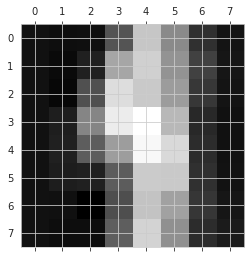

In [214]:
plt.matshow(digits_from_pca[42].reshape(8,8));

### t-SNE

t-SNE (T-distributed Stochastic Neighbor Embedding) je jiná technika, jak obrazit mnohorozměrná data do dvou či tří dimenzí.

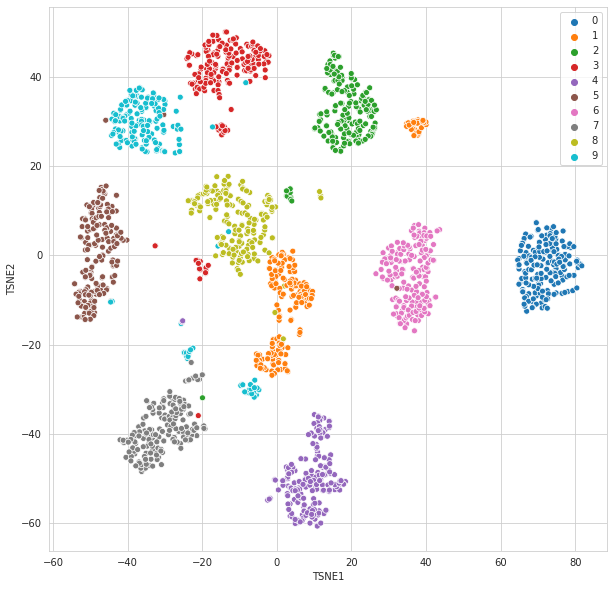

In [166]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
digits_tsne = pd.DataFrame(tsne.fit_transform(digits_df), columns=['TSNE1', 'TSNE2'])

plt.figure(figsize=(10,10)) 
sns.scatterplot(x=digits_tsne.TSNE1, y=digits_tsne.TSNE2, 
                hue=digits.target_names[digits.target], legend='full',
                palette=sns.color_palette());

## Filmová hodnocení

Všimněte si, že celou dnešní lekci jsme pracovali s daty, které byly na PCA jako dělané. Co ale dělat, když budou data obsahovat chybějící hodnoty?

Problém si demonstrujeme na hodnocení 50 filmů 100 diváky.

In [220]:
url_ratings = 'http://github.com/simecek/naucse.python.cz/blob/master/lessons/pydata/pca/static/ML_small.csv?raw=true'
ratings = pd.read_csv(url_ratings)

print(ratings.shape)
ratings.head()

(50, 101)


title  User1  User7  User13  User43  User44  User59  \
0       Air Force One (1997)    NaN    4.0     1.0     5.0     NaN     NaN   
1               Alien (1979)    5.0    4.0     4.0     NaN     4.0     5.0   
2              Aliens (1986)    5.0    3.0     3.0     NaN     5.0     5.0   
3  Back to the Future (1985)    5.0    5.0     5.0     4.0     4.0     5.0   
4       Birdcage, The (1996)    4.0    3.0     1.0     5.0     2.0     4.0   

   User62  User64  User92  ...  User864  User880  User881  User883  User889  \
0     NaN     3.0     NaN  ...      NaN      3.0      NaN      NaN      3.0   
1     4.0     5.0     4.0  ...      4.0      NaN      4.0      5.0      3.0   
2     5.0     4.0     5.0  ...      5.0      5.0      4.0      4.0      NaN   
3     3.0     NaN     4.0  ...      5.0      5.0      4.0      4.0      4.0   
4     NaN     NaN     3.0  ...      4.0      4.0      3.0      NaN      NaN   

   User892  User896  User913  User916  User919  
0      4.0      2.0      NaN      NaN      4.0  
1      5.0      4.0      4.0      4.0      3.0  
2      5.0      5.0      5.0      4.0      NaN  
3      4.0      4.0      4.0      3.0      4.0  
4      4.0      3.0      3.0      NaN      4.0  

[5 rows x 101 columns]

In [221]:
scaler = StandardScaler()
ratings_scaled = scaler.fit_transform(ratings.drop(columns='title'))

### Probabilistic PCA

In [215]:
# !pip install PyPPCA  # odstraňte komentář pro instalaci balíčku
from pyppca import ppca

In [223]:
# značení podle ppca
C, ss, M, X, Ye = ppca(ratings_scaled, 2, False)

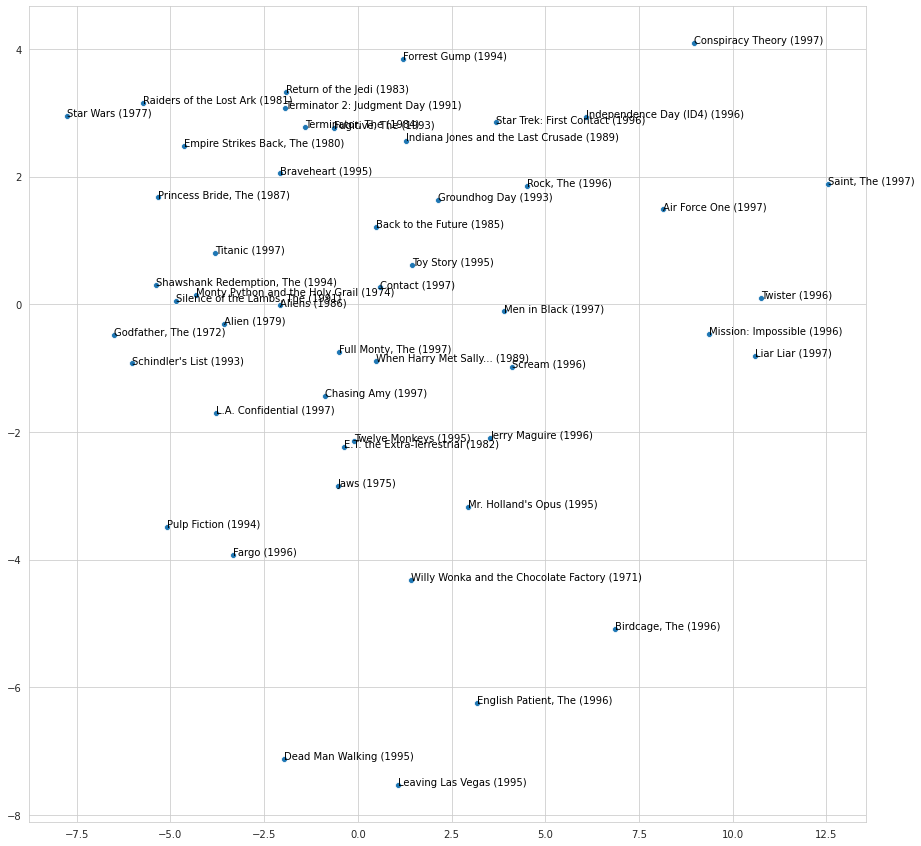

In [224]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(X[:,0], y=X[:,1])
for title, x, y in zip(ratings.title.values, X[:,0], X[:,1]):
    ax.text(x, y, title, size='medium', color='black')

## Final Remarks

* dvou nebo tří rozměrná data?
* kategoriální veličiny
* faktorová analýza
* LDA
* Shluková analýza jako další možnost unsupervised learning (učení bez učitele)
* Co dělat v případě kategoriálních dat (correspondence analysis)
* Biplot

